In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

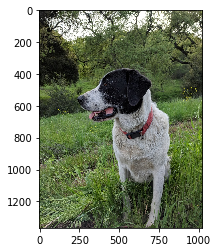

In [2]:
full = cv2.imread('../meta/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

plt.imshow(full)

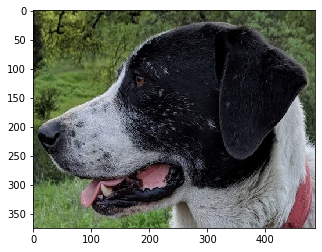

In [3]:
face= cv2.imread('../meta/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

plt.imshow(face)

# Template Matching

In [10]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 
           'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 
           'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [11]:
height, width,channels = face.shape

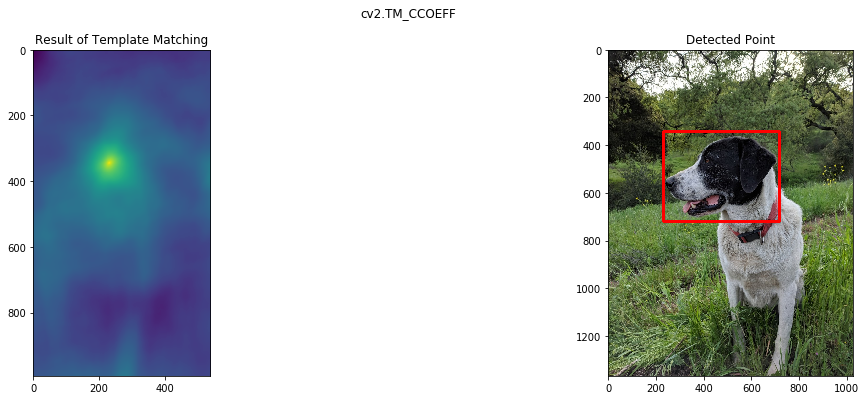

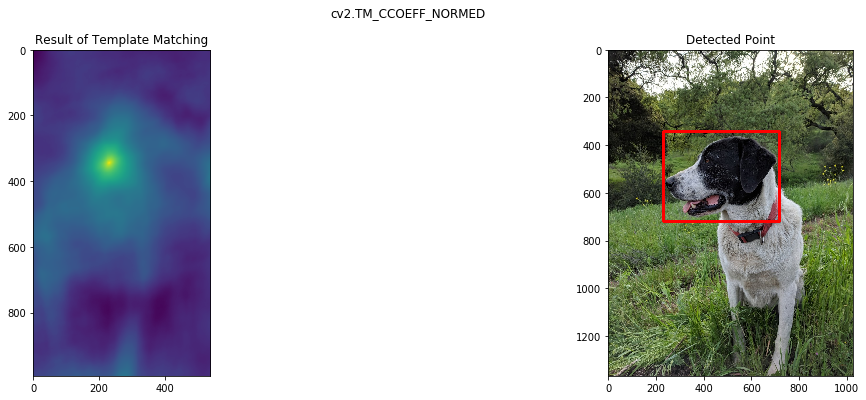

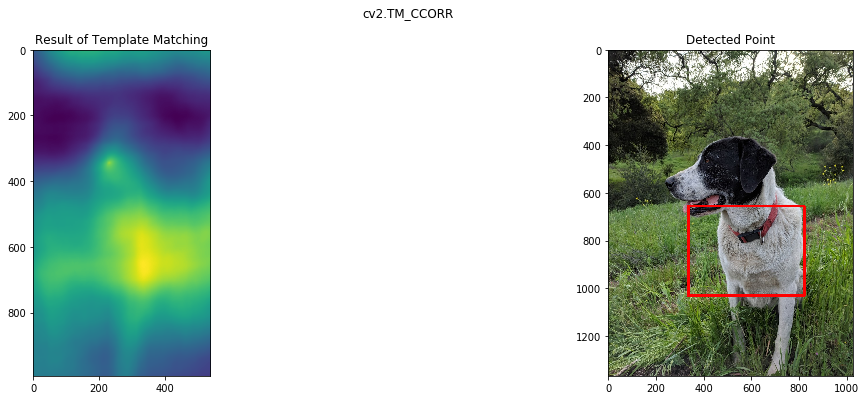

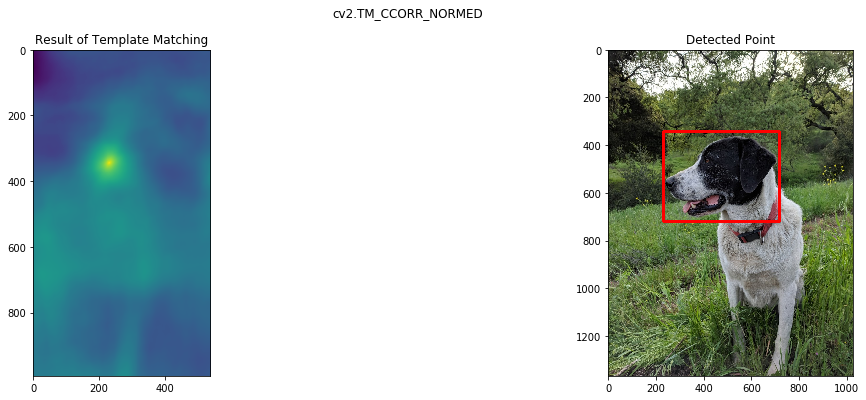

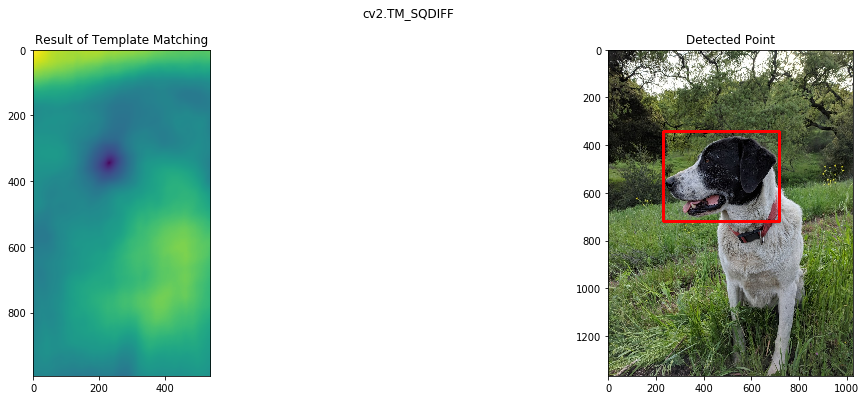

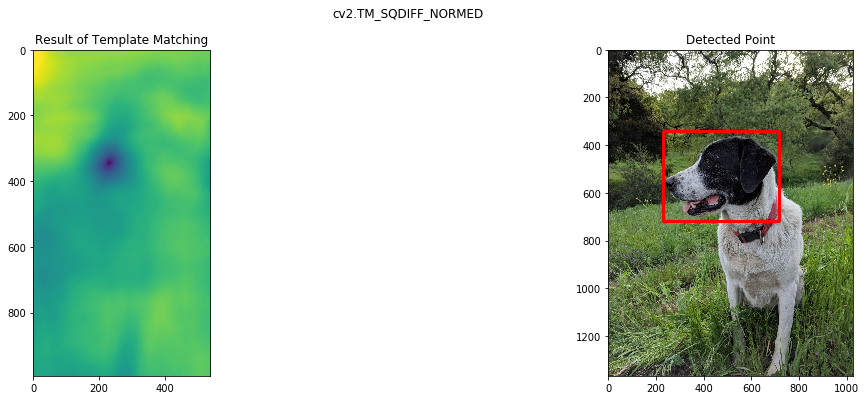

In [14]:
for method_ in methods:
    full_copy = full.copy()
    method = eval(method_)

    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].imshow(res)
    ax[0].set_title('Result of Template Matching')
    ax[1].imshow(full_copy)
    ax[1].set_title('Detected Point')
    fig.suptitle(method_)